In [2]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [4]:
train_data.shape

(8982,)

In [5]:
import numpy as np

def vector_sequences(sequences, dimension = 10000):       # Since the largest value of characters in 10000(almost) so the dimension will be 10000
    results = np.zeros((len(sequences), dimension))       # now converting the result into 0s and 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [6]:
x_train = vector_sequences(train_data)   
x_test = vector_sequences(test_data)

In [7]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))       # now converting the result into 0s and 1s
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
from keras import models
from keras import layers

In [9]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))   # For multi class classification the activation function will be "softmax"!

C:\Users\M.TECH COMPUTER\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [12]:
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs= 20, batch_size= 512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.4297 - loss: 3.0579 - val_accuracy: 0.6260 - val_loss: 1.7791
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6630 - loss: 1.5992 - val_accuracy: 0.6880 - val_loss: 1.3926
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7435 - loss: 1.1949 - val_accuracy: 0.7350 - val_loss: 1.1904
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7879 - loss: 0.9753 - val_accuracy: 0.7590 - val_loss: 1.0844
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8243 - loss: 0.8202 - val_accuracy: 0.7870 - val_loss: 1.0040
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8568 - loss: 0.6738 - val_accuracy: 0.8000 - val_loss: 0.9328
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8831 - loss: 0.5532 - val_accuracy: 0.8120 - val_loss: 0.8913
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9066 - loss: 0.4565 - val_accuracy: 0.8150 - v

In [15]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7981 - loss: 1.0775


[1.0975186824798584, 0.7880676984786987]

In [16]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

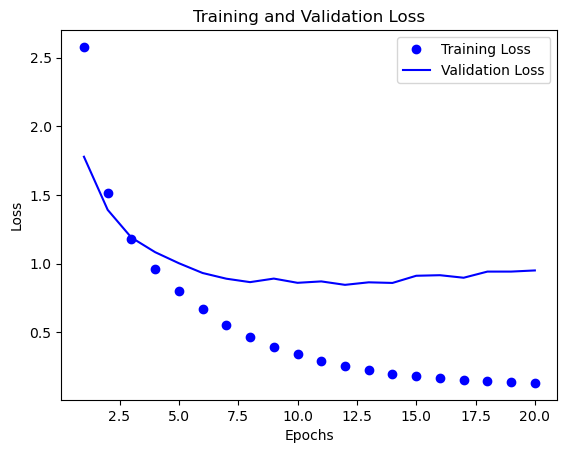

In [17]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

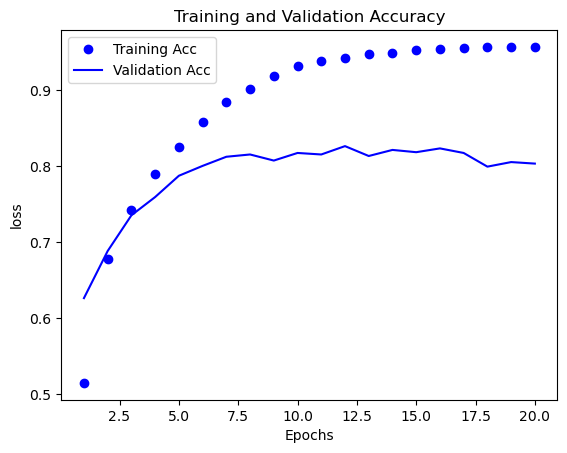

In [18]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics= ['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs= 9, batch_size= 512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4097 - loss: 3.1181 - val_accuracy: 0.6560 - val_loss: 1.7583
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6885 - loss: 1.5793 - val_accuracy: 0.7030 - val_loss: 1.3464
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7508 - loss: 1.1635 - val_accuracy: 0.7370 - val_loss: 1.1869
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7780 - loss: 0.9873 - val_accuracy: 0.7550 - val_loss: 1.0914
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8244 - loss: 0.8053 - val_accuracy: 0.7740 - val_loss: 1.0277
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8601 - loss: 0.6433 - val_accuracy: 0.8000 - val_loss: 0.9592
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8878 - loss: 0.5396 - val_accuracy: 0.8090 - val_loss: 0.9207
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9062 - loss: 0.4583 - val_accuracy: 0.8030 - val_loss:

In [22]:
results

[0.9663452506065369, 0.7818343639373779]

<function matplotlib.pyplot.show(close=None, block=None)>

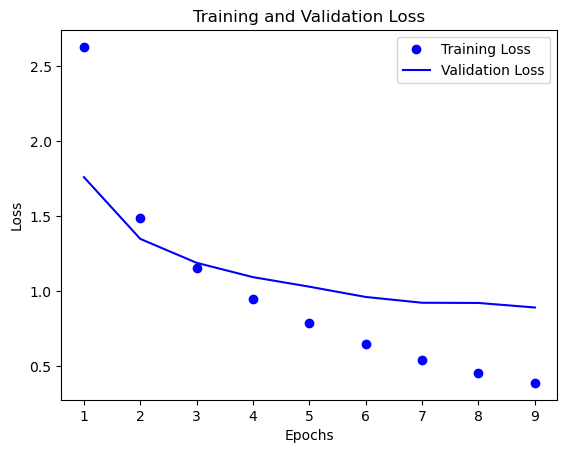

In [23]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

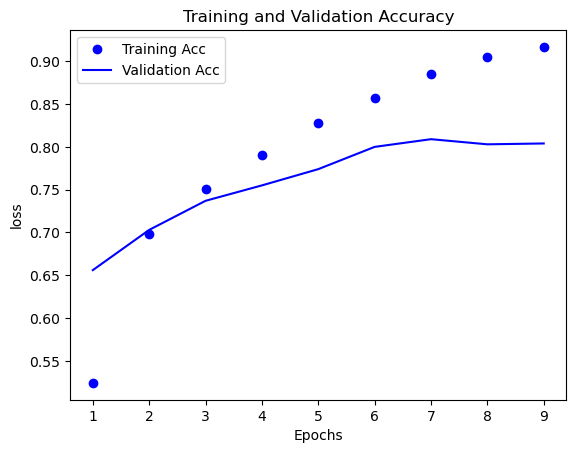

In [24]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Using Sparse Catagorical cross entropy

In [25]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics= ['acc'])

history = model.fit(x_train, y_train, epochs= 9, batch_size= 512)

C:\Users\M.TECH COMPUTER\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.4187 - loss: 3.1114
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.6614 - loss: 1.5639
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.7439 - loss: 1.1834
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.7969 - loss: 0.9540
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.8352 - loss: 0.7691
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.8595 - loss: 0.6509
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.8865 - loss: 0.5426
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.9052 - loss: 0.4524
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.9210 - loss: 0.3765


In [27]:
model.save('news.h5')
model.save('news.keras')

## Summary:
When you are working on "Multiclass Classification", if you are ding "One Hot Encoding" then use "Catagorical Cross Entropy" as loss Function, but if you dont want to manually do it than just use "Sparse Catagorical Cross Entropy"!

## Now lets tune the size of the network

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics= ['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs= 20, batch_size= 128, validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3898 - loss: 3.1489 - val_accuracy: 0.6060 - val_loss: 2.0069
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6023 - loss: 1.8570 - val_accuracy: 0.6140 - val_loss: 1.5850
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6237 - loss: 1.4612 - val_accuracy: 0.6220 - val_loss: 1.4671
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6241 - loss: 1.3465 - val_accuracy: 0.6300 - val_loss: 1.4113
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6640 - loss: 1.2020 - val_accuracy: 0.6640 - val_loss: 1.3849
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6979 - loss: 1.1368 - val_accuracy: 0.6790 - val_loss: 1.3638
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7262 - loss: 1.0323 - val_accuracy: 0.6830 - val_loss: 1.3473
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7475 - loss: 0.9641 - val_accuracy: 0.7030 - v

<function matplotlib.pyplot.show(close=None, block=None)>

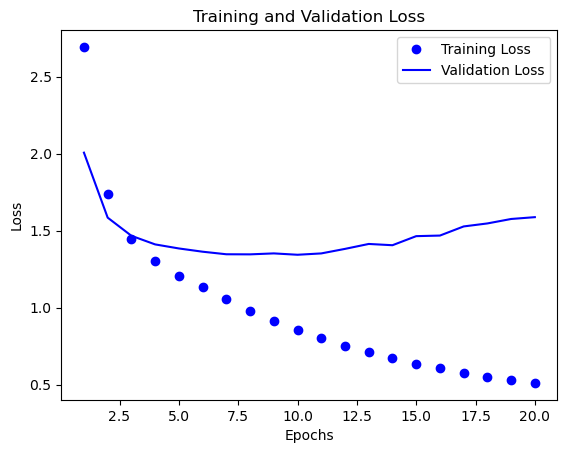

In [30]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

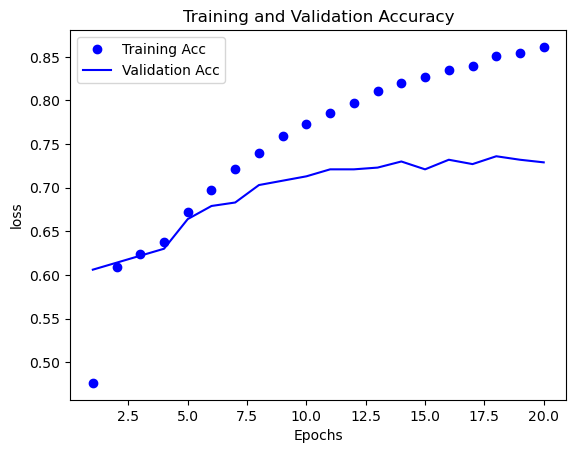

In [31]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics= ['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs= 20, batch_size= 128, validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5061 - loss: 2.4182 - val_accuracy: 0.7040 - val_loss: 1.2538
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7813 - loss: 0.9928 - val_accuracy: 0.7820 - val_loss: 0.9936
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8517 - loss: 0.6663 - val_accuracy: 0.7920 - val_loss: 0.9070
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8974 - loss: 0.4689 - val_accuracy: 0.8220 - val_loss: 0.8581
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9332 - loss: 0.3167 - val_accuracy: 0.8070 - val_loss: 0.9047
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9445 - loss: 0.2355 - val_accuracy: 0.8120 - val_loss: 0.9464
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9525 - loss: 0.1927 - val_accuracy: 0.8270 - val_loss: 0.9180
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9504 - loss: 0.1830 - val_accuracy: 0.8210 - v

<function matplotlib.pyplot.show(close=None, block=None)>

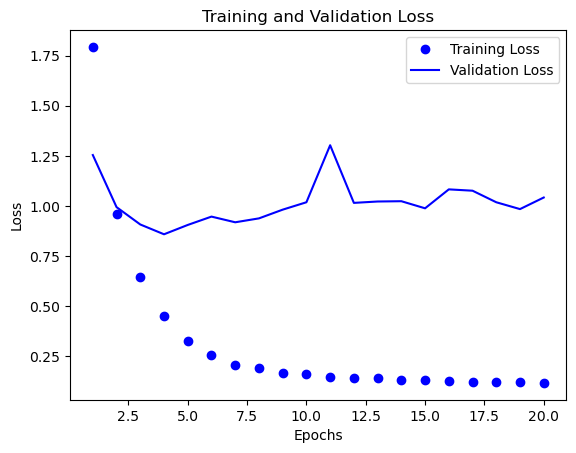

In [33]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

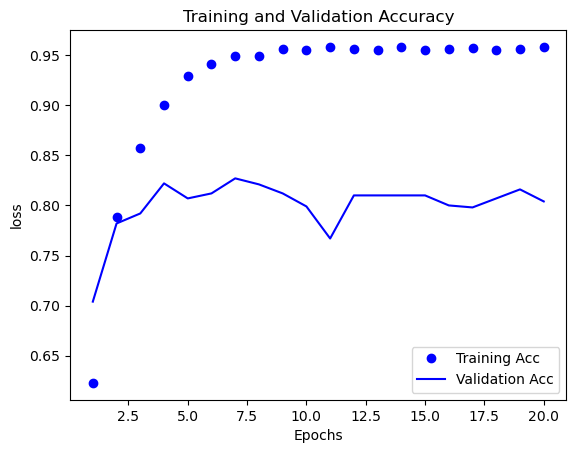

In [34]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()